<a href="https://colab.research.google.com/github/shwetakhanjan/student-learning-risk-ml/blob/main/notebooks/01_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

## Objective
The goal of this notebook is to explore a synthetically generated student math performance dataset,
validate feature ranges and distributions, analyze the target variable (`at_risk`),
and identify patterns that will inform feature engineering and model selection.


In [10]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of students
n_students = 500

# Generate features
student_id = [f"S{i:03d}" for i in range(1, n_students+1)]
age = np.random.randint(10, 15, n_students)
grade = np.random.randint(5, 9, n_students)
homework_completion = np.random.normal(85, 10, n_students).clip(50, 100).round(2)
practice_tests_avg = np.random.normal(75, 15, n_students).clip(40, 100).round(2)

class_participation = np.random.random_integers(2, 7, n_students).clip(0, 10)
geometry_score = np.random.normal(70, 15, n_students).clip(30, 100).round(2)
prealgebra_score = np.random.normal(72, 12, n_students).clip(40, 100).round(2)
recent_quiz_avg = np.random.normal(70, 15, n_students).clip(30, 100).round(2)
study_hours_per_week = np.random.normal(5, 2, n_students).clip(0, 10).round(2)

# Generate target label based on low performance
# At-risk if homework < 60 OR practice_tests_avg < 60 OR geometry < 50
at_risk = ((homework_completion < 60) |
           (practice_tests_avg < 60) |
           (geometry_score < 50)).astype(int)

# Create DataFrame
df = pd.DataFrame({
    "student_id": student_id,
    "age": age,
    "grade": grade,
    "homework_completion": (homework_completion),
    "practice_tests_avg": practice_tests_avg,
    "class_participation": class_participation,
    "geometry_score": (geometry_score),
    "algebra1_score": (prealgebra_score),
    "recent_quiz_avg":(recent_quiz_avg),
    "study_hours_per_week": study_hours_per_week,
    "at_risk": at_risk
})

# Save to CSV
df.to_csv("student_math_synthetic.csv", index=False)
print(df.head(15))
print(df["at_risk"].value_counts())

   student_id  age  grade  homework_completion  practice_tests_avg  \
0        S001   13      6               100.00               59.98   
1        S002   14      8                90.39               70.78   
2        S003   12      8                74.63              100.00   
3        S004   14      5                83.10               84.61   
4        S005   14      6                76.24               66.43   
5        S006   11      5                71.17               83.59   
6        S007   12      7                94.26               95.99   
7        S008   12      7               100.00               88.87   
8        S009   12      5                71.01               75.89   
9        S010   14      8                90.63               65.30   
10       S011   13      8                78.49               85.47   
11       S012   12      5                80.13               80.90   
12       S013   14      5                79.08               88.43   
13       S014   11  

/tmp/ipython-input-593842991.py:17: DeprecationWarning: This function is deprecated. Please call randint(2, 7 + 1) instead
  class_participation = np.random.random_integers(2, 7, n_students).clip(0, 10)


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [12]:
df = pd.read_csv("student_math_synthetic.csv")
df.head()


,student_id,age,grade,homework_completion,practice_tests_avg,class_participation,geometry_score,algebra1_score,recent_quiz_avg,study_hours_per_week,at_risk
0,S001,13,6,100.00,59.98,3,92.11,63.22,64.31,2.22,1
1,S002,14,8,90.39,70.78,5,64.72,59.72,74.98,3.81,0
2,S003,12,8,74.63,100.00,5,83.29,59.64,83.22,4.43,0
3,S004,14,5,83.10,84.61,7,73.45,63.01,64.30,3.76,0
4,S005,14,6,76.24,66.43,3,100.00,86.61,41.23,4.94,0


In [13]:
df.shape

(500, 11)

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            500 non-null    object 
 1   age                   500 non-null    int64  
 2   grade                 500 non-null    int64  
 3   homework_completion   500 non-null    float64
 4   practice_tests_avg    500 non-null    float64
 5   class_participation   500 non-null    int64  
 6   geometry_score        500 non-null    float64
 7   algebra1_score        500 non-null    float64
 8   recent_quiz_avg       500 non-null    float64
 9   study_hours_per_week  500 non-null    float64
 10  at_risk               500 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 43.1+ KB


### Feature Types

The dataset contains a mix of continuous and discrete features.

Continuous features include homework_completion, practice_test_avg, geometry_score, algebra1_score, recent_quiz_avg,
and study_hours_per_week, as they represent measurable academic
performance or behavioral quantities and can conceptually take fractional values.

Discrete features include grade_level, age, class_participation, and the binary target
variable at_risk.


In [15]:
df.describe()


,age,grade,homework_completion,practice_tests_avg,class_participation,geometry_score,algebra1_score,recent_quiz_avg,study_hours_per_week,at_risk
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,11.970000,6.39400,84.961080,76.090760,4.548000,69.047940,72.502600,69.150300,4.99990,0.236000
std,1.425891,1.11591,9.203245,14.195048,1.710423,14.871012,11.541961,14.540711,2.00545,0.425047
min,10.000000,5.00000,58.030000,40.000000,2.000000,30.000000,40.000000,30.000000,0.00000,0.000000
25%,11.000000,5.00000,78.877500,65.917500,3.000000,59.070000,63.995000,59.445000,3.60750,0.000000
50%,12.000000,6.00000,85.275000,76.395000,5.000000,69.165000,72.990000,68.750000,5.02000,0.000000
75%,13.000000,7.00000,91.510000,85.930000,6.000000,79.332500,81.275000,79.530000,6.48250,0.000000
max,14.000000,8.00000,100.000000,100.000000,7.000000,100.000000,100.000000,100.000000,10.00000,1.000000


In [7]:
continuous_features = ["homework_completion",
                       "practice_tests_avg", "geometry_score", "algebra1_score", "recent_quiz_avg", "study_hours_per_week"]

df_continuous = df[continuous_features]
df_continuous.head()


,homework_completion,practice_tests_avg,geometry_score,algebra1_score,recent_quiz_avg,study_hours_per_week
0,100.00,59.98,92.11,63.22,64.31,2.22
1,90.39,70.78,64.72,59.72,74.98,3.81
2,74.63,100.00,83.29,59.64,83.22,4.43
3,83.10,84.61,73.45,63.01,64.30,3.76
4,76.24,66.43,100.00,86.61,41.23,4.94


In [8]:
corr_matrix = df_continuous.corr()
corr_matrix


,homework_completion,practice_tests_avg,geometry_score,algebra1_score,recent_quiz_avg,study_hours_per_week
homework_completion,1.000000,0.071415,-0.043098,0.059782,0.099110,0.002757
practice_tests_avg,0.071415,1.000000,-0.019769,-0.016660,0.073379,0.015392
geometry_score,-0.043098,-0.019769,1.000000,0.026493,0.038158,-0.037252
algebra1_score,0.059782,-0.016660,0.026493,1.000000,0.003447,-0.011304
recent_quiz_avg,0.099110,0.073379,0.038158,0.003447,1.000000,0.063578
study_hours_per_week,0.002757,0.015392,-0.037252,-0.011304,0.063578,1.000000


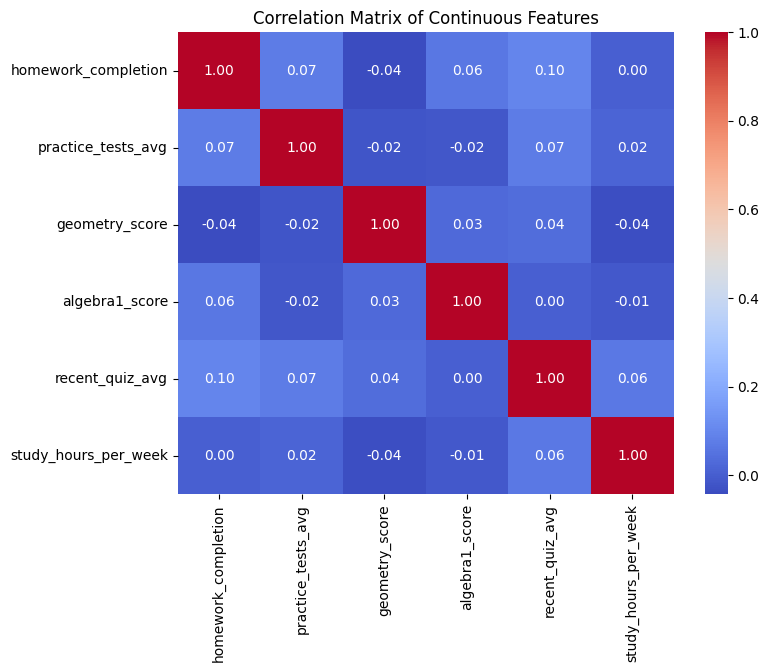

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Continuous Features")
plt.show()


### Correlation Analysis

The correlation matrix shows moderate to strong positive relationships between academic
performance metrics such as geometry_score, prealgebra_score, and practice_test_avg,
which is expected as these features measure related competencies.

Homework_completion and study_hours_per_week exhibit weaker but still positive
correlations with test scores, suggesting that study behaviors contribute to performance
but are not the sole determinants.

No extreme multicollinearity (>0.9) was observed, indicating that features provide
complementary information and are suitable for use together in downstream models.


### Interpretation of Unexpected Correlations

An unexpected negative correlation was observed between study_hours_per_week and
test performance metrics. This can be explained by several plausible factors.

Students who are academically struggling may increase study time in response to
difficulty, while higher-performing students may require fewer study hours to
achieve strong outcomes. Additionally, study_hours_per_week captures quantity
rather than quality of study and may be subject to reporting noise.

This observation highlights the importance of cautious interpretation of behavioral
features and reinforces the need for multivariate models rather than relying on
individual feature correlations.

### Correlation Heatmap Interpretation

The correlation matrix shows very weak correlations among continuous academic features
(homework_completion, practice_tests_avg, geometry_score, algebra1_score, recent_quiz_avg).
This is expected for a synthetic dataset generated with largely independent distributions.

While in real-world data we might expect moderate positive correlations between test scores,
the independence in this dataset is acceptable for demonstrating modeling workflow.

These results highlight the need for multivariate modeling, as no single feature alone is
highly predictive of others. Any unexpected relationships observed (e.g., small negative
correlations) are consistent with the synthetic nature of the data.


In future iterations, this feature could be refined by incorporating measures of
study effectiveness or interaction terms combining study time with homework
completion and assessment performance.


## Day 2 Summary and Next Steps

This exploratory analysis validated the structure and realism of the synthetic
student performance dataset. While individual feature correlations were weak,
the dataset captures meaningful academic and behavioral signals that are
appropriate for supervised learning.

The next phase will focus on feature engineering, baseline model training,
and evaluation using metrics that prioritize identifying at-risk students.


# New section